In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
! kaggle datasets download -d mathchi/churn-for-bank-customers --unzip --force

Dataset URL: https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers
License(s): CC0-1.0
  0% 0.00/261k [00:00<?, ?B/s]
100% 261k/261k [00:00<00:00, 117MB/s]


# Understanding the datas

In [ ]:
df = pd.read_csv("churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(9,7))

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

Text(0.5, 1.0, 'Churn Distribution')

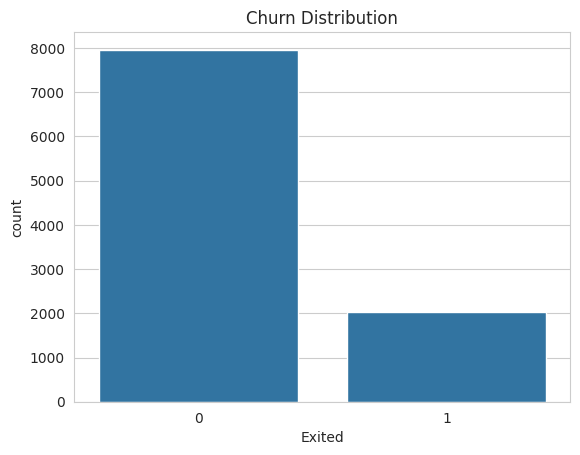

In [ ]:
sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution")

Text(0.5, 1.0, 'Age Distribution')

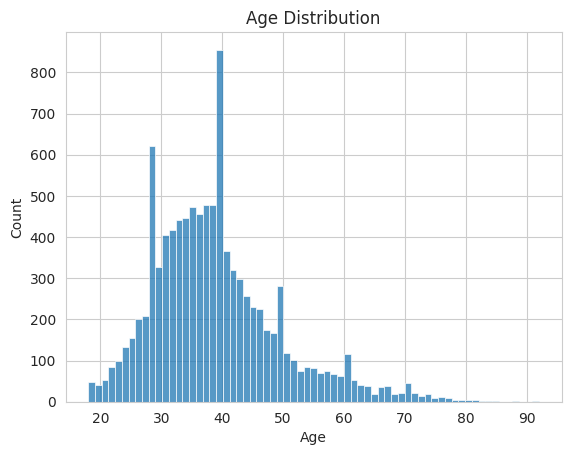

In [ ]:
sns.histplot(x="Age", data=df)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Credit Score vs Age')

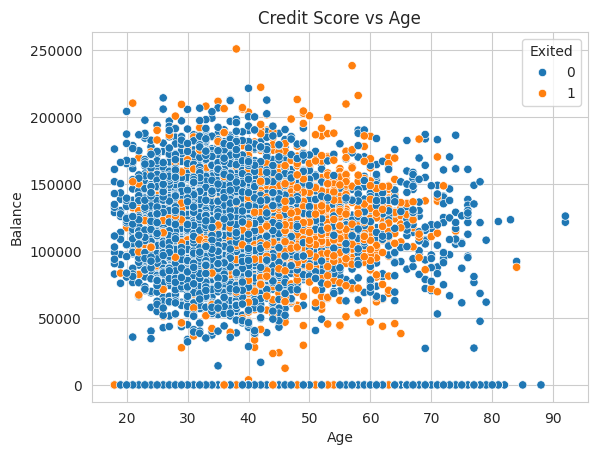

In [ ]:
sns.scatterplot(data=df, x="Age", y="Balance", hue="Exited")
plt.title("Credit Score vs Age")

Text(0.5, 1.0, 'Balance Distribution by Churn')

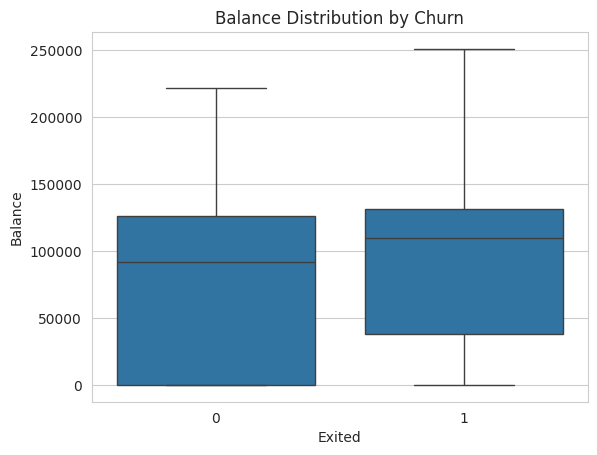

In [ ]:
sns.boxplot(data=df, x="Exited", y="Balance")
plt.title("Balance Distribution by Churn")

Text(0.5, 1.0, 'CreditScore Distribution by Churn')

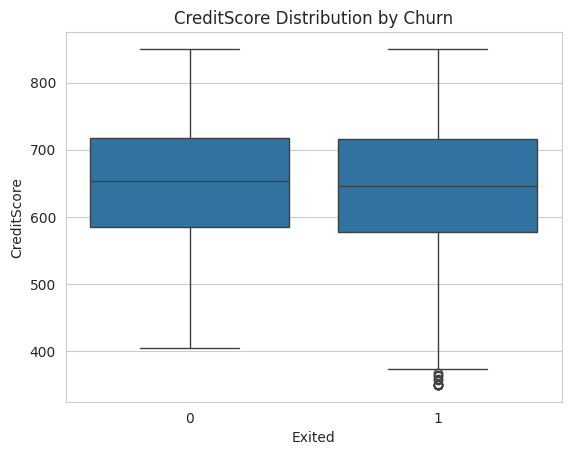

In [ ]:
sns.boxplot(data=df, x="Exited", y="CreditScore")
plt.title("CreditScore Distribution by Churn")

# Datas Processing

In [ ]:
features = df.drop("Exited", axis=1)
features

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
target = df["Exited"]
target

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
features = features.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
features = features.dropna()
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
features = pd.get_dummies(features, columns=["Geography", "Gender"])
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


## Splitting the datas



In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Scaling the features (normalize the range of independant values)
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
lr_model = LogisticRegression(random_state=42)

In [ ]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
lr_prediction = lr_model.predict(X_test)

In [ ]:
lr_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_prediction)
lr_accuracy

0.811

In [ ]:
import xgboost as xgb

In [ ]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
  print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
  print("-----------------")

  with open(filename, "wb") as f:
    pickle.dump(model, f)

  print(f"Model saved as {filename}")

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

XGBClassifier Accuracy: 0.8625

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

-----------------
Model saved as xgb_model.pkl


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "dt_model.pkl")

DecisionTreeClassifier Accuracy: 0.7805

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000

-----------------
Model saved as dt_model.pkl


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

RandomForestClassifier Accuracy: 0.8635

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

-----------------
Model saved as rf_model.pkl


In [ ]:
nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, "nb_model.pkl")

GaussianNB Accuracy: 0.8200

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1607
           1       0.56      0.38      0.45       393

    accuracy                           0.82      2000
   macro avg       0.71      0.65      0.67      2000
weighted avg       0.80      0.82      0.81      2000

-----------------
Model saved as nb_model.pkl


In [ ]:
knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, "knn_model.pkl")


KNeighborsClassifier Accuracy: 0.8290

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.73      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000

-----------------
Model saved as knn_model.pkl


In [ ]:
svm_model = SVC(random_state=42)
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, "svm_model.pkl")

SVC Accuracy: 0.8545

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.76      0.38      0.50       393

    accuracy                           0.85      2000
   macro avg       0.81      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000

-----------------
Model saved as svm_model.pkl


In [ ]:
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

In [ ]:
feature_importances

array([0.03500515, 0.10955004, 0.03005428, 0.05278617, 0.32388842,
       0.03194036, 0.16414644, 0.03265523, 0.04646328, 0.09137332,
       0.0368547 , 0.04528258, 0.        ], dtype=float32)

In [ ]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
feature_importance_df

,Feature,Importance
0,CreditScore,0.035005
1,Age,0.109550
2,Tenure,0.030054
3,Balance,0.052786
4,NumOfProducts,0.323888
5,HasCrCard,0.031940
6,IsActiveMember,0.164146
7,EstimatedSalary,0.032655
8,Geography_France,0.046463
9,Geography_Germany,0.091373


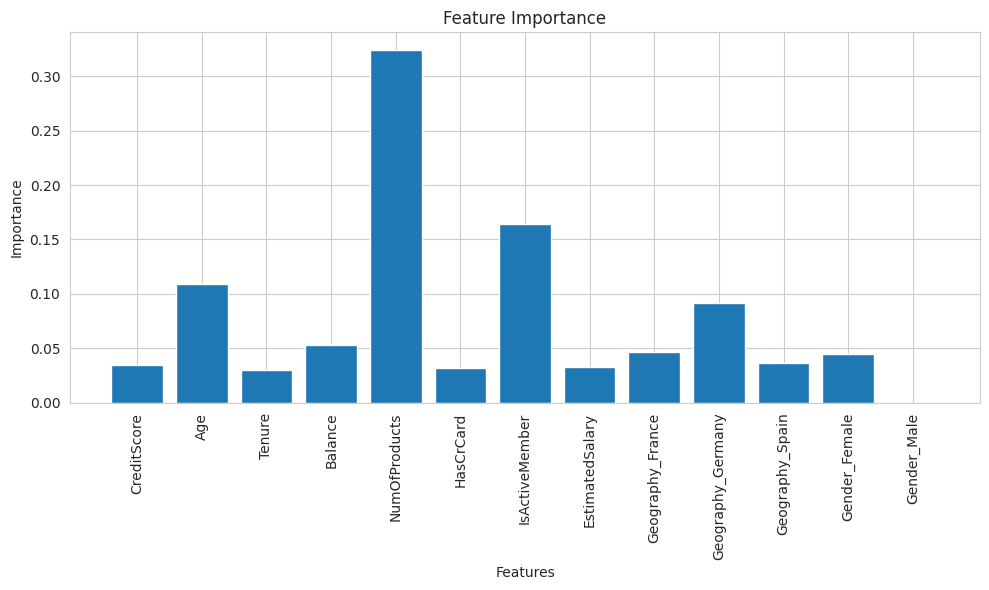

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [ ]:
features["CLV"] = df["Balance"] * df["EstimatedSalary"] /1000

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000e+00
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,9.431953e+06
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,1.819041e+07
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000e+00
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,9.925910e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000e+00
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,5.834476e+06
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000e+00
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,6.973634e+06


In [ ]:
features["AgeGroup"] = pd.cut(df["Age"],bins = [0,30,45,60,100], labels=["Young","MiddleAge","Senior","Eldery"]  )

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000e+00,MiddleAge
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,9.431953e+06,MiddleAge
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,1.819041e+07,MiddleAge
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000e+00,MiddleAge
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,9.925910e+06,MiddleAge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000e+00,MiddleAge
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,5.834476e+06,MiddleAge
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000e+00,MiddleAge
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,6.973634e+06,MiddleAge


In [ ]:
features["TenureAgeRatio"] = features["Tenure"] / features["Age"]

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,TenureAgeRatio
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000e+00,MiddleAge,0.047619
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,9.431953e+06,MiddleAge,0.024390
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,1.819041e+07,MiddleAge,0.190476
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000e+00,MiddleAge,0.025641
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,9.925910e+06,MiddleAge,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000e+00,MiddleAge,0.128205
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,5.834476e+06,MiddleAge,0.285714
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000e+00,MiddleAge,0.194444
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,6.973634e+06,MiddleAge,0.071429


In [ ]:
features = pd.get_dummies(features, drop_first=True)
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Eldery
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000e+00,0.047619,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,9.431953e+06,0.024390,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,1.819041e+07,0.190476,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000e+00,0.025641,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,9.925910e+06,0.046512,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000e+00,0.128205,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,5.834476e+06,0.285714,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000e+00,0.194444,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,6.973634e+06,0.071429,True,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
xgboost_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgboost_model, X_train, X_test, y_train, y_test, "xgboost_modelEngineered.pkl")

XGBClassifier Accuracy: 0.8540

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

-----------------
Model saved as xgboost_modelEngineered.pkl


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
evaluate_and_save_model(xgboost_model, X_resampled, X_test, y_resampled, y_test, "xgboost_modelSMOTE.pkl")

XGBClassifier Accuracy: 0.8595

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.67      0.56      0.61       393

    accuracy                           0.86      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000

-----------------
Model saved as xgboost_modelSMOTE.pkl


In [ ]:
import importlib
import sklearn
importlib.reload(sklearn)
from sklearn.ensemble import VotingClassifier
from sklearn.utils.validation import check_is_fitted

class SafeVotingClassifier(VotingClassifier):
    def __sklearn_tags__(self):
        return {"allow_nan": True}

voting_clf = SafeVotingClassifier(
    estimators=[
        ("xgboost", xgb.XGBClassifier(random_state=42)),
        ("random_forest", RandomForestClassifier(random_state=42)),
        ("logistic_regression", LogisticRegression(random_state=42)),
        ("svm", SVC(random_state=42, probability=True))
    ],
    voting="soft"
)
evaluate_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, "voting_clf.pkl")

AttributeError: 'dict' object has no attribute 'estimator_type'